In [6]:
from loadingCGAN.cgan import Cgan, switching_gans
from loadingCGAN.mlp import Mlp
from evaluation.evaluation import evaluate
import numpy as np
from load_data.load_data import load_data

# Parameters
attack_mode = None
epochs = 1000
number_of_gans = 1
number_of_switch = 1

# DATA
x_train, y_train, x_balanced_train, y_balanced_train, x_test, y_test = load_data(verbose=False)
data_dim = x_train.shape[1]
print("\n"*2)
print("Train data shape is {}".format(x_balanced_train.shape))
print("\n "*2)

/home/peseux/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/peseux/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)





Train data shape is (117260, 122)

 
 


In [2]:
data_dim=122

In [4]:
cgan = Cgan(data_dim=data_dim,
              spectral_normalisation=False,
              weight_clipping=False, verbose=False)

Instructions for updating:
Colocations handled automatically by placer.


/home/peseux/Desktop/gitELECOM/cGANoDEbergerac/loadingCGAN/cgan.py:172: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(18, input_dim=122, kernel_constraint=None)`
  model.add(dense(18, input_dim=np.prod(self.data_dim), W_constraint=W_constraint))
/home/peseux/Desktop/gitELECOM/cGANoDEbergerac/loadingCGAN/cgan.py:174: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, kernel_constraint=None)`
  model.add(dense(12,W_constraint=W_constraint))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/home/peseux/Desktop/gitELECOM/cGANoDEbergerac/loadingCGAN/cgan.py:177: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_constraint=None)`
  model.add(dense(10,W_constraint=W_constraint))
/home/peseux/Desktop/gitELECOM/cGANoDEbergerac/loadingCGAN/cgan.py:182: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_constraint=None)`
  activation='sigmoid'))
/home/peseux/Desktop/gitELECOM/cGANoDEbergerac/loadingCGAN/cgan.py:136: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=32, kernel_initializer=<keras.ini..., kernel_constraint=None)`
  W_constraint=W_constraint))
/home/peseux/Desktop/gitELECOM/cGANoDEbergerac/loadingCGAN/cgan.py:141: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(18, kernel_initializer=<keras.ini..., kernel_constraint=None)`
  W_constraint=W_constraint))
/home/peseux/Desktop/gitELECOM/cGANoDEbergerac/loadingCGAN/cgan.py:147: UserWarning: Update your `D

In [5]:
cgan.load_model(location="save_models/models/", model_name="test1")

In [11]:
probas = list(cgan.predict_proba(x_test))
y_true = list(y_test)

In [9]:
from matplotlib import pyplot as plt

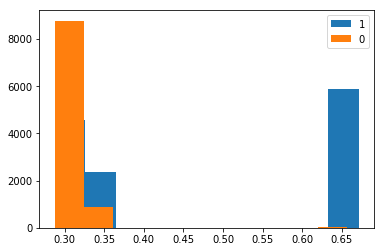

In [15]:
plt.hist([p for p,y in zip(probas, y_true) if y >.5], label="1")
plt.hist([p for p,y in zip(probas, y_true) if y <.5], label="0")
plt.legend()
plt.show()
plt.close()

In [27]:
y_balanced_train.sum() / y_balanced_train.shape[0]

0.5

In [28]:
########
# CGAN #
########


cgans = [Cgan(data_dim=data_dim, spectral_normalisation=False, batch_size=512) for _ in range(number_of_gans)]
for _ in range(number_of_switch):
    for cgan in cgans:
        cgan.train(x_train=x_balanced_train, # x_train,
                   y_train=y_balanced_train, # ,y_train
                   epochs=epochs,
                   print_recap=False,
                   reload_images_p=.99,
                   show_past_p=.95)
    if number_of_gans > 1:
        switching_gans(cgans)

CHOSEN OPTIMIZER IS ADAM

 
 Discriminator Architecture 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 18)                2214      
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 18)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 12)                228       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 12)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                130       
_________________________________________________________________
leaky_re_lu_13 (Lea

  0%|          | 0/1000 [00:00<?, ?it/s]/home/peseux/.local/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
100%|██████████| 1000/1000 [15:25<00:00,  1.16it/s]


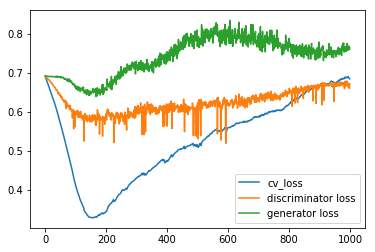

True

In [29]:
cgan = cgans[0]
cgan.plot_learning()

In [30]:
result_cgan = evaluate(y_true=y_test, y_pred=cgan.predict(x=x_test))

In [31]:
x = x_test[:100]

In [32]:
ones = np.ones((x.shape[0], 1))
zeros = np.zeros((x.shape[0], 1))
y_pred_ones = cgan.discriminator.predict([x, ones])
y_pred_zeros = cgan.discriminator.predict([x, zeros])

In [34]:
y_pred_zeros

array([[0.40714642],
       [0.4068571 ],
       [0.515135  ],
       [0.48289678],
       [0.46698484],
       [0.5278679 ],
       [0.51731175],
       [0.5040026 ],
       [0.52770466],
       [0.49677348],
       [0.5211913 ],
       [0.5266422 ],
       [0.40733477],
       [0.43354803],
       [0.49564832],
       [0.5282564 ],
       [0.52755225],
       [0.5281186 ],
       [0.5051309 ],
       [0.4089321 ],
       [0.4145268 ],
       [0.43373418],
       [0.5276476 ],
       [0.5282634 ],
       [0.41118813],
       [0.40858477],
       [0.52803886],
       [0.527784  ],
       [0.5073581 ],
       [0.5049753 ],
       [0.46693382],
       [0.5279056 ],
       [0.5269902 ],
       [0.41256925],
       [0.40022376],
       [0.39996094],
       [0.52772874],
       [0.5222695 ],
       [0.48288992],
       [0.515004  ],
       [0.39417446],
       [0.52843565],
       [0.5266595 ],
       [0.5272111 ],
       [0.4039896 ],
       [0.5279142 ],
       [0.3942866 ],
       [0.527

In [35]:
def false_or_true(x):
    if x[0] < .5 and x[1] < .5:
        return 0
    elif x[0] > x[1]:
        return 0
    elif x[0] == x[1]:
        print("FUCK")
        return 1
    else:
        return 1

In [36]:
y_pred = [false_or_true([y0[0], y1[0]]) for y0, y1 in zip(y_pred_zeros, y_pred_ones)]

In [39]:
np.array(y_pred) - np.array(y_test[:100]).tolist()

array([ 0.,  0.,  0., -1., -1.,  0.,  0., -1.,  0., -1., -1.,  0.,  0.,
       -1.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0., -1., -1.,
        0.,  0., -1.,  0., -1.,  0.,  0.,  0.,  0., -1.,  0., -1.,  0.,
        0.,  0.,  0.,  0.,  0., -1.,  0.,  0., -1., -1.,  0.,  0.,  0.,
        0.,  0., -1.,  0., -1., -1., -1.,  0., -1., -1.,  0.,  0.,  0.,
        0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
        0.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,
        0.,  0., -1., -1.,  0.,  0.,  0.,  0., -1.])

In [40]:
generated_one = cgan.generate(number=100, labels=np.ones(100))
generated_zero = cgan.generate(number=100, labels=np.zeros(100))
#############
# Classical #
#############
mlp = Mlp(data_dim=data_dim)
d_loss_classical = mlp.train(x_train=x_balanced_train, y_train=y_balanced_train, epochs=epochs*number_of_switch)

result_mlp = evaluate(y_true=y_test, y_pred=mlp.predict(x=x_test))
result_mlp_fooling = evaluate(y_true=np.zeros(100+100), y_pred=mlp.predict(np.concatenate((generated_one, generated_zero))))


print(result_cgan)

print(result_mlp)

print(result_mlp_fooling)

CHOSEN OPTIMIZER IS ADAM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 18)                2214      
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 18)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 12)                228       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 12)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                130       
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 10)            

  0%|          | 0/1000 [00:00<?, ?it/s]


{'confusion_matrix': array([[9701,   10],
       [8581, 4252]]), 'precision': 0.997653683716565, 'recall': 0.33133328138393203, 'f1_score': 0.49745539631471186, 'accuracy': 0.6189229950319376}
{'confusion_matrix': array([[ 9711,     0],
       [12833,     0]]), 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0, 'accuracy': 0.43075762952448543}
{'confusion_matrix': array([[200]]), 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0, 'accuracy': 1.0}


/home/peseux/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/peseux/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
